<center><img src="img/Sante-publique-France-logo.svg.png" style="width: 500px;"/></center>

**Application au service de la santé publique : Nettoyage des données**


**Contexte :**

L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Pour y participer, il nous faut proposer une idée d’application.

**Les données :**

Nous utiliserons les données de **Open Food Fact** disponiblent à l'adresse suivante : [openfoodfacts.csv](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip). Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Principes de l'application :**

L'application que nous voulons développement doit participer à informer le grand public sur les apport nutritionnels des différents aliments que l'on peut rencontrer. Le but est de conseiller et améliorer l'alimentation des français et donc leur santé.

---

# Sommaire

---

# Importation des librairies

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format


# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

Versions :

In [2]:
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
NumPy    : 1.20.3
Pandas   : 1.3.4
Seaborn  : 0.11.2


Style des tableaux :

In [3]:
%%html
<style>
    table {float:left}
</style>

---

# Importation des données

Les données regroupent des informations sur des produits alimentaires vendus dans le monde.

In [4]:
df_raw_data = pd.read_csv(
    "data/fr.openfoodfacts.org.products.csv",
    encoding='utf8',
    sep="\t",
    low_memory=False
)
df_raw_data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,

## Description des données

## Vue globale des données

In [5]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [6]:
print("")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_raw_data.shape[0],df_raw_data.shape[1]))
print("{} Code référencés.".format(len(df_raw_data['code'].unique())))
print("{} Noms de produits référencés.".format(len(df_raw_data['product_name'].unique())))

duplicates = df_raw_data.duplicated(subset=["code","product_name"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")
print("")


----------------------------------
320772 entrées et 162 variables.
320750 Code référencés.
221348 Noms de produits référencés.
Présence de données dupliquées.



## Les variables

In [7]:
print(*df_raw_data.columns, sep = "\n")

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

> Nous avons dans les données des informations sur :
> - Les pays de disponibilité des produits;
> - Les composition des produits;
> - Les apports caloriques et nutritives.

In [8]:
df_raw_data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.00,248939.00,248939.00,0.00,248939.00,0.00,0.00,261113.00,857.00,243891.00,229554.00,0.00,0.00,1.00,2.00,4.00,1.00,1.00,1.00,24.00,23.00,0.00,0.00,1.00,0.00,22823.00,22859.00,841.00,186.00,38.00,78.00,188.00,149.00,8.00,24.00,23.00,21.00,13.00,0.00,14.00,0.00,0.00,0.00,143298.00,144090.00,243588.00,244971.00,72.00,26.00,38.00,262.00,4.00,11.00,266.00,414.00,200886.00,259922.00,27.00,16.00,9.00,255510.00,255463.00,4133.00,137554.00,34.00,7057.00,1340.00,918.00,140867.00,11154.00,10815.00,11729.00,6784.00,5240.00,3042.00,5300.00,330.00,2483.00,38.00,81.00,24748.00,158.00,141050.00,5845.00,140462.00,6253.00,3929.00,2106.00,1620.00,79.00,1168.00,20.00,11.00,259.00,78.00,29.00,49.00,3036.00,165.00,948.00,0.00,268.00,221210.00,221210.00,0.00,0.00
mean,NaN,1.94,0.02,NaN,0.06,NaN,NaN,1141.91,585.50,12.73,5.13,NaN,NaN,7.40,6.04,36.14,18.90,8.10,3.00,10.75,10.67,NaN,NaN,61.00,NaN,10.43,6.31,3.18,2.25,3.19,1.64,16.23,3.82,0.06,0.15,0.06,40.19,25.12,NaN,0.00,NaN,NaN,NaN,0.07,0.02,32.07,16.00,11.84,2.88,25.90,6.35,24.33,12.16,31.92,49.79,2.86,7.08,4.66,2.51,0.02,2.03,0.80,7.84,0.00,0.52,0.00,0.06,0.03,0.02,0.33,0.26,0.02,0.02,0.01,0.21,0.00,0.12,0.07,0.01,0.12,0.42,0.09,0.13,0.62,0.00,0.53,0.01,0.03,0.00,0.01,0.00,0.00,0.00,0.00,1.59,0.15,6.43,31.46,15.41,49.55,NaN,341.70,9.17,9.06,NaN,NaN
std,NaN,2.50,0.14,NaN,0.27,NaN,NaN,6447.15,712.81,17.58,8.01,NaN,NaN,NaN,0.23,24.10,NaN,NaN,NaN,4.02,3.38,NaN,NaN,NaN,NaN,17.08,10.83,5.61,7.97,13.93,1.98,17.51,6.49,0.03,0.03,0.01,25.18,26.01,NaN,0.00,NaN,NaN,NaN,1.54,0.36,29.73,22.33,13.99,6.29,30.02,14.39,17.79,8.37,24.70,33.21,12.87,8.41,2.98,2.19,0.00,128.27,50.50,10.96,0.07,2.56,0.00,0.69,1.03,2.24,2.47,1.28,0.34,1.21,0.34,5.13,0.01,0.74,1.48,0.04,0.19,12.53,0.15,3.32,12.06,0.21,13.50,0.08,0.91,0.03,0.07,0.10,0.01,0.00,0.00,6.48,0.17,2.05,31.97,3.75,18.76,NaN,425.21,9.06,9.18,NaN,NaN
min,NaN,0.00,0.00,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,7.40,5.88,0.04,18.90,8.10,3.00,0.06,5.20,NaN,NaN,61.00,NaN,0.00,0.00,0.00,0.00,0.05,0.04,0.05,0.09,0.01,0.10,0.04,1.00,1.08,NaN,0.00,NaN,NaN,NaN,-3.57,0.00,0.00,-17.86,0.00,0.00,0.00,0.00,0.10,1.50,0.00,0.00,-6.70,-800.00,0.92,0.30

> Le dataset présente des valeurs nulles et des données sur tous les pays. Il sera nécessaire de faire un nettoyage des données pour ne garde que les informations pertinentes pour répondre à notre problématique.

# Filtrage des produits vendus en France

Pour notre application, nous allons nous concentrer sur un public français. Afin de réduire la taille des données à traiter, nous allons garder uniquement les produits disponibles en France.

La colonne **countries** regroupes les pays dans lesqueks sont disponibles les produits.

    countries : list of countries where the product is sold

**Contribution des pays:**

In [9]:
df_top_countries = df_raw_data.groupby('countries')[['code']].count().reset_index()
df_top_countries = df_top_countries.sort_values(by='code', ascending=False).head(20)

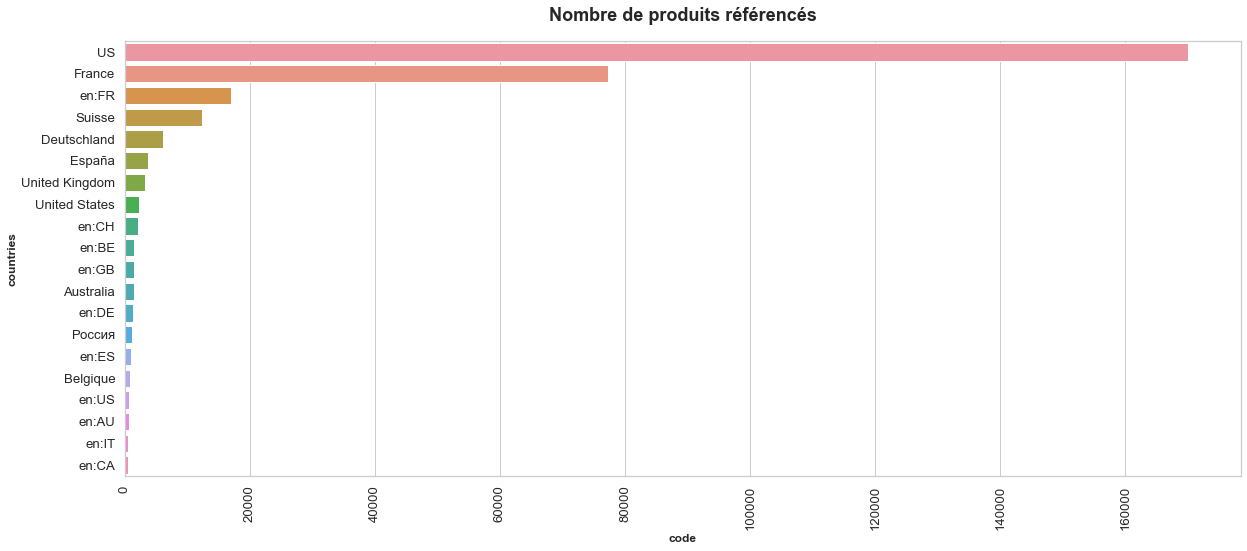

In [10]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="code", y="countries", data=df_top_countries)
ax.set_title('Nombre de produits référencés')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

> La France est l'un des pays pour lesquels nous avons le plus de données et de produits référencés.

**Filtre :**

Pour certains produits, les pays sont séparés par une virgule dans la colonne "countries". Pour récupérer toutes les données concernant la France, nous effectuons un trie sur la colonnes pour les valeurs contenant "fr".

In [11]:
df_data_fr = df_raw_data[df_raw_data['countries'].str.contains('fr', na=False, case=False)]

In [12]:
print("")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_data_fr.shape[0],df_data_fr.shape[1]))
print("{} Coutries référencés.".format(len(df_data_fr['countries'].unique())))

duplicates = df_data_fr.duplicated(subset=["code"], keep='first')
if duplicates.any():
    print("Présence de données code dupliquées.")
else:
    print("Absence de données code dupliquées.")
    
duplicates = df_data_fr.duplicated(subset=["product_name"], keep='first')
if duplicates.any():
    print("Présence de product_name dupliquées.")
else:
    print("Absence de product_name dupliquées.")

print("")


----------------------------------
98468 entrées et 162 variables.
661 Coutries référencés.
Absence de données code dupliquées.
Présence de product_name dupliquées.



> En effectuant cette sélection, nous n'avons plus de code dupliquées et le nombre de produits est réduits. Toutefois, dans le cas d'une mise à jour des données, nous impémentons le traitement des doublons.

????

# Sélection des variables

## Le Nutri-Score

**Définition :**

Une des varaiables courament utilisé au niveau du grand public est le nutri-grade. Il s'agit d'un logo qui renseigne de façon simplifié sur la qualité nutritionnlle d'un produit. Il est noté de A(meilleur score) à E(moins bon score).

<center><img src="img/declinaison-logo-nutriscore.jpg" style="width: 500px;"/></center>

**Attribution :**

Le score prenant est défini par 2 critères pour 100gr ou 100ml et dépend du calcul du nitri-score :

- en nutriments et aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive),
- en nutriments à limiter (énergie, acides gras saturés, sucres, sel).

Il nous faudra donc tenir donc de la qualité des produits pour notre application.

In [13]:
df_data_fr['nutrition_grade_fr'].unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

> On observe qu'il existe des produits avec un nutri-grade non renseignés.

<Figure size 1440x720 with 0 Axes>

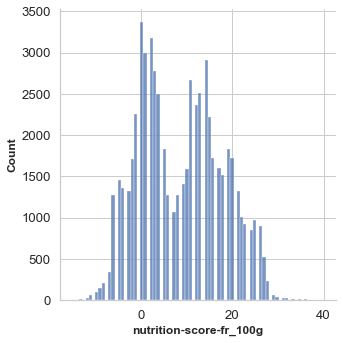

In [14]:
plt.figure(figsize=(20, 10))
ax = sns.displot(df_data_fr, x="nutrition-score-fr_100g", palette="GnBu_r")
#ax.set_title('Nutri-score')
plt.show()

## Colonnes pertinentes

*TODO : voir les colones 'created_t' et 'last_modified_t' pour eliminer des doublons ?*

### Suppression des variables vides

In [15]:
df_data_fr.dropna(how='all', axis=1, inplace=True)
print("Nombre de colonnes restantes : {}".format(df_data_fr.shape[1]))

Nombre de colonnes restantes : 136


### Sélection des variables qualitatives

In [16]:
cols_cat_to_keep = [
    'code',
    'image_url',
    'product_name',
    'pnns_groups_1',
    'pnns_groups_2',
    'origins',
    'manufacturing_places',
    'categories',
    'nutrition_grade_fr',
    'additives_n',
    'additives_fr',
    'ingredients_from_palm_oil_n',
]

| Variable | Définition | 
| --- | --- |
| code | Identifiant du produit |
| image_url | Photo ou illustration du produit |
| product_name | Nom du produit |
| pnns_groups_1 | Classement du produit |
| pnns_groups_2 | Sous-classement du produits |
| origins | Origine des ingrédients |
| manufacturing_places | Lieu de fabrication |
| categories | Catégorie du produits |
| nutrition_grade_fr | Nutri-score de A à E |
| additives_n | Nombre d'additifs |
| additives_fr | Liste des additifs |
| ingredients_from_palm_oil_n | Nombre d'ingrédients d'huile de palme |

### Sélection des variables quantitatives

On supprime les colonnes qui ne nous apportent pas d'informations sur les apports nutrionnelles des aliments :

In [17]:
cols_quant_to_keep = df_data_fr.columns[df_data_fr.columns.str.endswith('_100g')]
cols_quant_to_keep.to_list()

['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'lauric-acid_100g',
 'arachidic-acid_100g',
 'montanic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vi

### Sélection par taux de remplissage

Récupération des colonnes choisies :

In [18]:
all_cols_to_keep = [*cols_cat_to_keep, *cols_quant_to_keep]
df_data_fr = df_data_fr[all_cols_to_keep]

Taux de remplissage :

In [19]:
cols_filling_rate = (df_data_fr.notnull().sum() / len(df_data_fr)).sort_values(ascending=False)

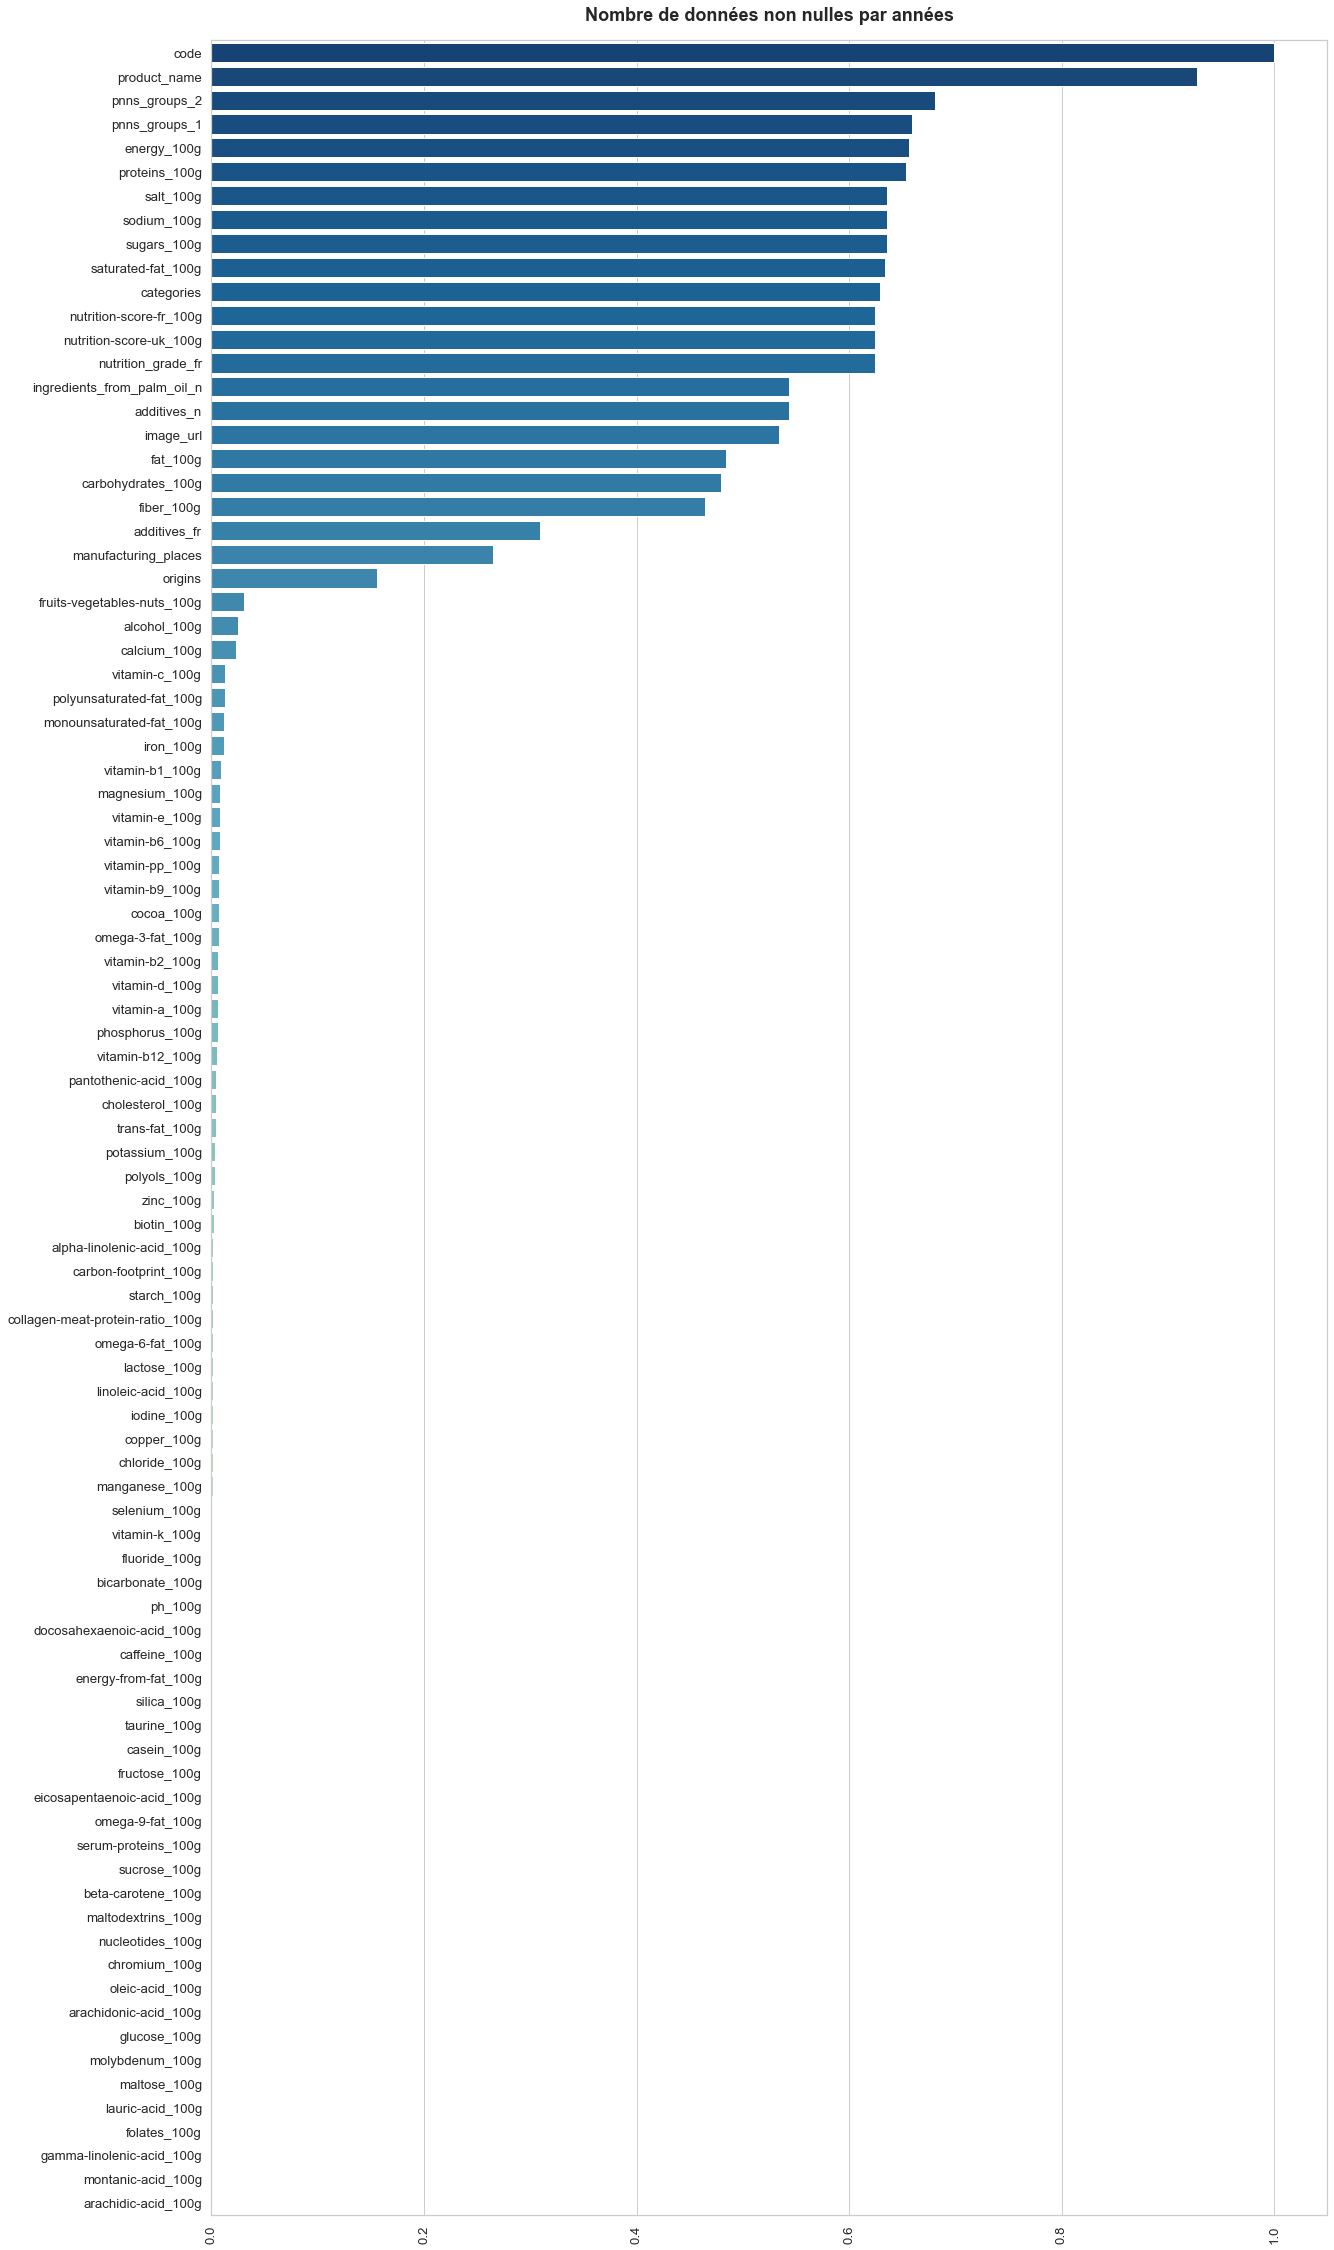

In [20]:
plt.figure(figsize=(20, 40))
ax = sns.barplot(cols_filling_rate.values, cols_filling_rate.index, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

On garde les colonnes ayant un taux de remplissage suppérieur à 20% :

In [21]:
df_data_fr.drop(columns=cols_filling_rate[cols_filling_rate < 0.20].index, inplace=True)
df_data_fr = df_data_fr.drop(columns = "nutrition-score-uk_100g")

In [22]:
df_data_fr.sample(2)

,code,image_url,product_name,pnns_groups_1,pnns_groups_2,manufacturing_places,categories,nutrition_grade_fr,additives_n,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
277008,5400247019509,http://fr.openfoodfacts.org/images/products/540/024/701/9509/front.7.400.jpg,Pâte à tartiner aux noisettes,Sugary snacks,Sweets,Pays-Bas,Pâtes à tartiner aux noisettes et au cacao,e,1.00,E322 - Lécithines,1.00,2353.00,35.00,9.00,59.00,58.00,NaN,2.00,0.01,0.00,25.00
249189,3661974000358,http://fr.openfoodfacts.org/images/products/366/197/400/0358/front.6.400.jpg,Orange,Beverages,Sweetened beverages,NaN,"Boissons aux fruits,Boissons à l'orange",e,3.00,"E330 - Acide citrique,E300 - Acide ascorbique,E160a - Bêta-carotène",0.00,158.00,0.30,0.10,9.30,9.00,0.50,0.20,0.01,0.00,12.00


# Nettoyage par produits

- Traitement des produits peu renseignés
- Données aberrantes
- Données manquantes (hors nutri-score et nutri-grade)

In [23]:
df_data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98468 entries, 0 to 320770
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         98468 non-null  object 
 1   image_url                    52558 non-null  object 
 2   product_name                 91286 non-null  object 
 3   pnns_groups_1                64905 non-null  object 
 4   pnns_groups_2                67063 non-null  object 
 5   manufacturing_places         26113 non-null  object 
 6   categories                   61981 non-null  object 
 7   nutrition_grade_fr           61451 non-null  object 
 8   additives_n                  53501 non-null  float64
 9   additives_fr                 30473 non-null  object 
 10  ingredients_from_palm_oil_n  53501 non-null  float64
 11  energy_100g                  64627 non-null  float64
 12  fat_100g                     47677 non-null  float64
 13  saturated-fat_1

## Suppression des produits sans noms

On supprime les produits sans "nom de produit" renseigné :

In [24]:
print('Nombre de produits sans nom renseigné : {}'.format(len(df_data_fr[df_data_fr['product_name'].isnull()])))
df_data_fr = df_data_fr[df_data_fr['product_name'].notnull()]

Nombre de produits sans nom renseigné : 7182


## Suppression des produits sans indicateurs nutritionnel

In [25]:
# nutrition columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# filter
df_nutri = df_data_fr.select_dtypes(include=numerics)

In [26]:
nutri_cols_all = df_nutri.columns.tolist()
nutri_cols_all.remove('additives_n')
nutri_cols_all.remove('ingredients_from_palm_oil_n')

nutri_cols = nutri_cols_all.copy()
nutri_cols.remove('nutrition-score-fr_100g')
print(nutri_cols)

['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


In [27]:
df_data_fr.dropna(subset=nutri_cols, how='all',inplace=True)
df_data_fr.shape

(64880, 21)

# Traitement des valeurs abérantes

In [28]:
df_data_fr.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,44338.00,44338.00,64257.00,47326.00,62060.00,46892.00,62196.00,45523.00,63985.00,62254.00,62251.00,61028.00
mean,2.01,0.08,1170.84,13.34,5.43,27.73,13.42,2.56,7.76,1.16,0.46,8.69
std,2.61,0.27,12866.49,16.94,8.54,27.42,19.08,4.64,7.89,4.30,1.69,9.04
min,0.00,0.00,0.00,0.00,0.00,0.00,-0.10,0.00,0.00,0.00,0.00,-15.00
25%,0.00,0.00,427.00,1.30,0.30,4.00,1.00,0.00,1.80,0.08,0.03,1.00
50%,1.00,0.00,1035.00,6.80,2.00,14.50,4.10,1.30,6.00,0.56,0.22,9.00
75%,3.00,0.00,1649.00,21.00,7.40,53.00,17.72,3.20,11.00,1.24,0.49,15.00
max,31.00,2.00,3251373.00,380.00,210.00,190.00,105.00,178.00,100.00,211.00,83.00,40.00


Plusieurs variables présentent des valeurs abérantes dans le dataset. Par exemple, "energy_100g" possède des valeurs excessives (max) ou encore "sugars_100g" des valeurs négatives.

**Colonnes devant être entre 0 et 100 :**

In [29]:
nutri_cols_ne = nutri_cols.copy()
nutri_cols_ne.remove('energy_100g')

In [30]:
print(nutri_cols_ne)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


## Suppresion des energy abérantes

Pour déterminer les valeurs abbérantes en "energy", on se base sur la valeur maximum q'un aliment peut apporter. Le [Site de Nutrisens](https://www.nutrisens.com/vitalites/comment-decrypter-les-valeurs-nutritionnelles/) fournit le détail des valeurs nutritionnels:
- 1g de Glucides = 17 kJ
- 1g de lipide = 38 KJ
- 1g de protéine = 17 kJ
Donc pour 100g d'aliment, la valeurs énergétique est au maximum de 3800 kJ

**Suppression des valeurs au dessus de 3800 KJ:**

In [31]:
df_data_fr = df_data_fr[df_data_fr['energy_100g'] < 3800]

**Distribution des valurs "energy" restantes:**

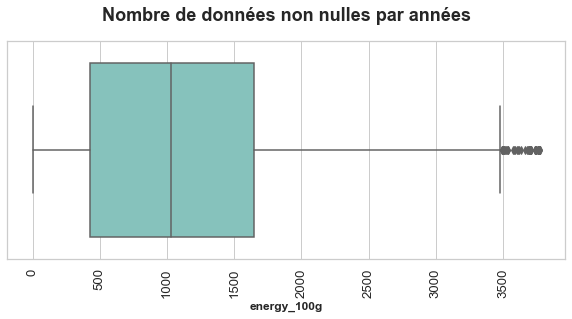

In [32]:
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x=df_data_fr["energy_100g"], palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [33]:
df_data_fr.shape

(64167, 21)

## Suppression des valeurs nutritionnelles négatives

In [34]:
for col in nutri_cols_ne:
    df_data_fr = df_data_fr.drop(df_data_fr.index[df_data_fr[col] < 0])
df_data_fr.shape

(64166, 21)

## Suppression des valeurs nutritionnelles suppérieur à 100

In [35]:
for col in nutri_cols_ne:
    df_data_fr = df_data_fr.drop(df_data_fr.index[df_data_fr[col] > 100])
df_data_fr.shape

(64157, 21)

## Cohérence des indicateurs

### Graisse

La quantité de graisse saturée ne peut pas être suppérieur à la quantité de graisse présente dans le produits.

In [36]:
df_data_fr = df_data_fr.drop(
    df_data_fr[df_data_fr['saturated-fat_100g'] < df_data_fr['fat_100g']].index)
df_data_fr.shape

(23976, 21)

### Sucres

Les carbohydrates (glucose) sont des dérivés du sucre. Par conséquent, la quantité de carbohydrates ne peut pas être suppérieur à la quantité de sucre présente dans le produits.

In [37]:
df_data_fr = df_data_fr.drop(
    df_data_fr[df_data_fr['carbohydrates_100g'] < df_data_fr['sugars_100g']].index)
df_data_fr.shape

(23955, 21)

### Sel

In [38]:
df_data_fr = df_data_fr.drop(
    df_data_fr[df_data_fr['sodium_100g'] > df_data_fr['salt_100g']/2.4].index)
df_data_fr.shape

(23955, 21)

In [39]:
df_data_fr.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,6981.00,6981.00,23955.00,6653.00,21723.00,6811.00,22039.00,20147.00,23732.00,22108.00,22108.00,21596.00
mean,1.89,0.02,995.49,3.21,4.57,26.25,15.97,2.02,6.62,1.26,0.50,8.67
std,2.58,0.15,785.82,9.84,8.99,30.73,22.17,5.21,8.61,5.93,2.34,8.70
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-13.00
25%,0.00,0.00,259.00,0.00,0.00,4.60,1.20,0.00,0.50,0.02,0.01,1.00
50%,1.00,0.00,879.00,0.00,0.80,11.00,6.00,0.00,4.00,0.18,0.07,8.00
75%,3.00,0.00,1561.00,0.50,5.07,49.00,20.00,2.20,9.00,1.00,0.39,15.00
max,20.00,2.00,3774.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,39.37,36.00


---

# Traitement des valeurs manquantes

In [40]:
df_data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23955 entries, 138 to 320763
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         23955 non-null  object 
 1   image_url                    7614 non-null   object 
 2   product_name                 23955 non-null  object 
 3   pnns_groups_1                10074 non-null  object 
 4   pnns_groups_2                10154 non-null  object 
 5   manufacturing_places         2631 non-null   object 
 6   categories                   9358 non-null   object 
 7   nutrition_grade_fr           21596 non-null  object 
 8   additives_n                  6981 non-null   float64
 9   additives_fr                 4117 non-null   object 
 10  ingredients_from_palm_oil_n  6981 non-null   float64
 11  energy_100g                  23955 non-null  float64
 12  fat_100g                     6653 non-null   float64
 13  saturated-fat

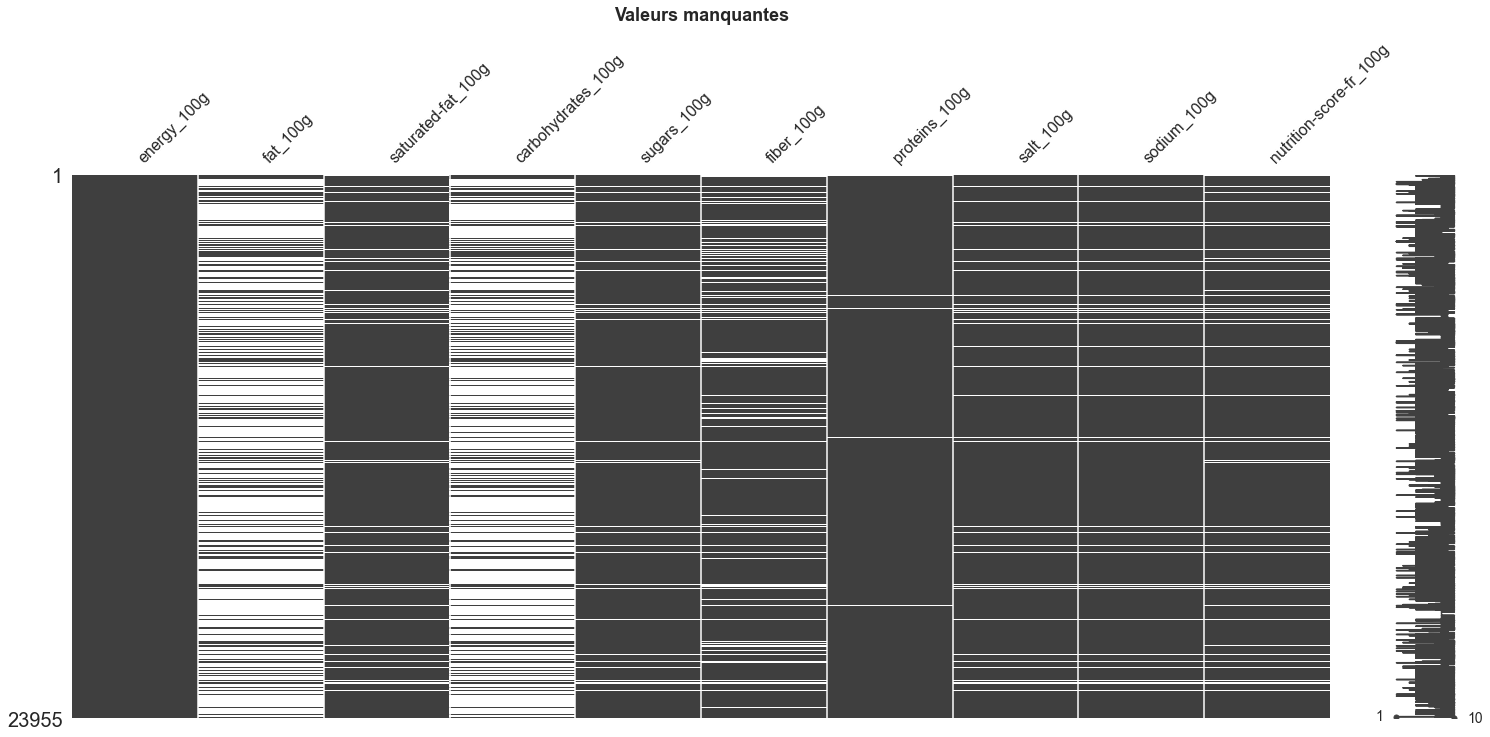

In [41]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

## Traitement par catégorie de produits

L'idée est de remplacer les valeurs manquantes des valeurs nutritionnels par les moyennes des groupes respectifs.

In [42]:
print(df_data_fr['pnns_groups_1'].unique())

['unknown' nan 'Beverages' 'Composite foods' 'Fat and sauces'
 'Fruits and vegetables' 'Sugary snacks' 'Salty snacks'
 'Cereals and potatoes' 'Fish Meat Eggs' 'Milk and dairy products'
 'fruits-and-vegetables' 'sugary-snacks']


In [43]:
print(df_data_fr['pnns_groups_2'].unique())

['unknown' nan 'Sweetened beverages' 'One-dish meals'
 'Non-sugared beverages' 'Dressings and sauces' 'Fruits' 'Sweets' 'Nuts'
 'Fruit juices' 'Breakfast cereals' 'Cereals' 'Dried fruits' 'Sandwich'
 'Chocolate products' 'Vegetables' 'Fish and seafood' 'Cheese'
 'Processed meat' 'Meat' 'Artificially sweetened beverages'
 'Fruit nectars' 'Bread' 'Biscuits and cakes' 'Alcoholic beverages'
 'Pizza pies and quiche' 'Legumes' 'vegetables' 'Fats' 'Appetizers'
 'Milk and yogurt' 'Ice cream' 'Soups' 'Dairy desserts' 'pastries'
 'Potatoes' 'Tripe dishes' 'Eggs' 'fruits' 'Salty and fatty products']


On observe que des produits non pas de catégories renseignés. Pour le calcul de chacune des moyennes, nous filtrons donc les produits ayant un catégorie et des valeurs non nulles.

In [44]:
df_data_grp = df_data_fr.copy()

In [45]:
for col in nutri_cols_ne:
    df_data_grp[col] = df_data_grp[col].fillna(df_data_grp.groupby(['pnns_groups_1','pnns_groups_2'])[col].transform('mean'))

In [46]:
df_data_grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23955 entries, 138 to 320763
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         23955 non-null  object 
 1   image_url                    7614 non-null   object 
 2   product_name                 23955 non-null  object 
 3   pnns_groups_1                10074 non-null  object 
 4   pnns_groups_2                10154 non-null  object 
 5   manufacturing_places         2631 non-null   object 
 6   categories                   9358 non-null   object 
 7   nutrition_grade_fr           21596 non-null  object 
 8   additives_n                  6981 non-null   float64
 9   additives_fr                 4117 non-null   object 
 10  ingredients_from_palm_oil_n  6981 non-null   float64
 11  energy_100g                  23955 non-null  float64
 12  fat_100g                     10200 non-null  float64
 13  saturated-fat

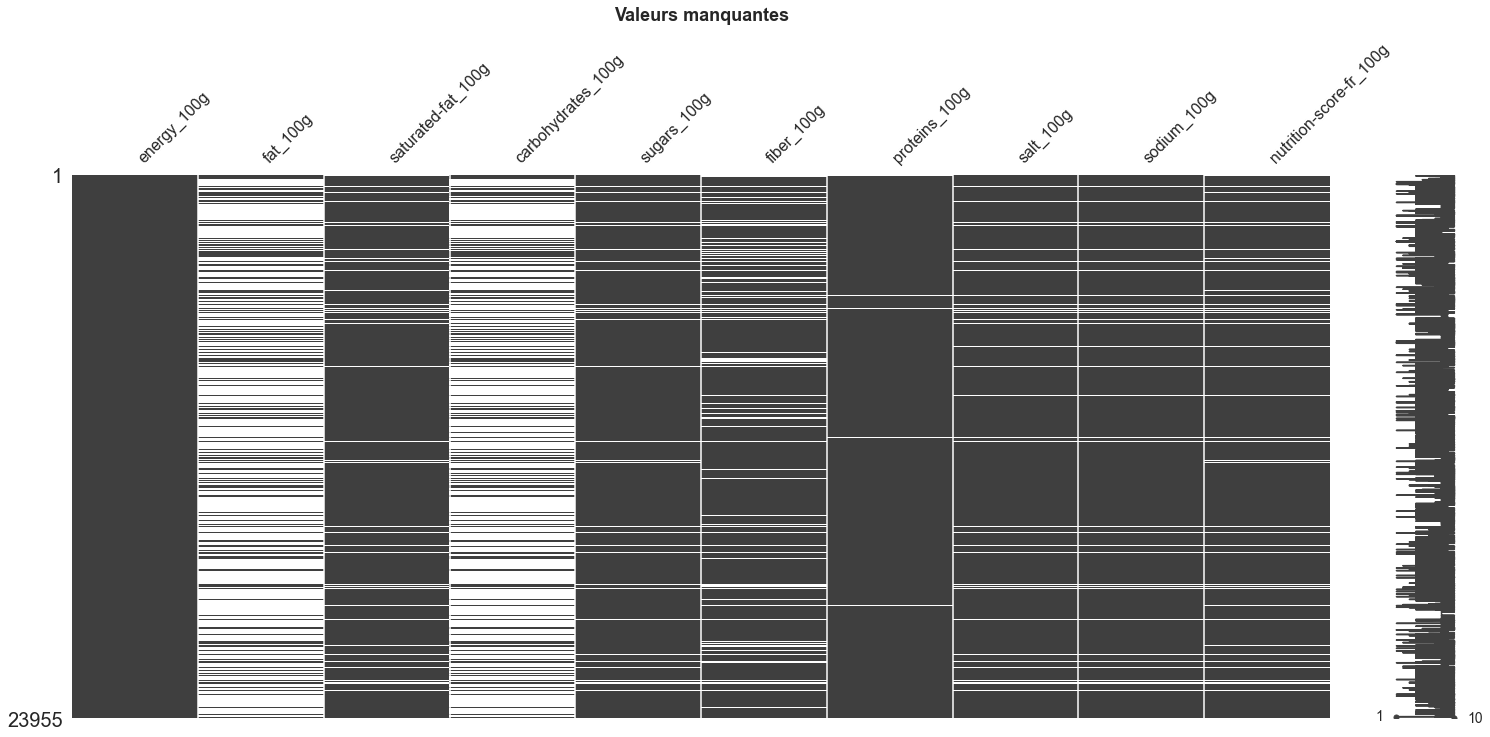

In [47]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

## Traitement par inputation

In [48]:
df_data = df_data_fr[nutri_cols_ne]

df_data_no_nan = df_data_fr.dropna()

### KNNImputer

Ici, on utilise **KNNImputer** plutôt qu'une fonction Pandas pour faire de l'imputation car on va utiliser **GridSearchCV** afin d'opitmiser le modèle.

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

Paramètre par défaut :

In [50]:
params = {
    'knnimputer__n_neighbors' : np.arange(1,20)
}

**Meilleurs hyperparamètres :**

In [51]:
X = df_data_no_nan[nutri_cols_ne]
y = df_data_no_nan['nutrition-score-fr_100g']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(250, 8)
(108, 8)


In [52]:
model = make_pipeline(KNNImputer(), SGDClassifier())
skf = StratifiedKFold(n_splits=10, shuffle=True)

grid = GridSearchCV(model, param_grid = params, cv = skf)   #cv : cross-validation
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [53]:
best_params = grid.best_params_
Y_pred = grid.predict(X_test)

print(best_params)

{'knnimputer__n_neighbors': 9}


**Modèle optimisé :**

In [54]:
imputer = KNNImputer(n_neighbors = grid.best_params_['knnimputer__n_neighbors'])
data_filled = imputer.fit_transform(df_data)
df_data[:] = data_filled

**Remplacement des valeurs manquantes :**

In [55]:
df_data_fr[nutri_cols_ne] = df_data[nutri_cols_ne]

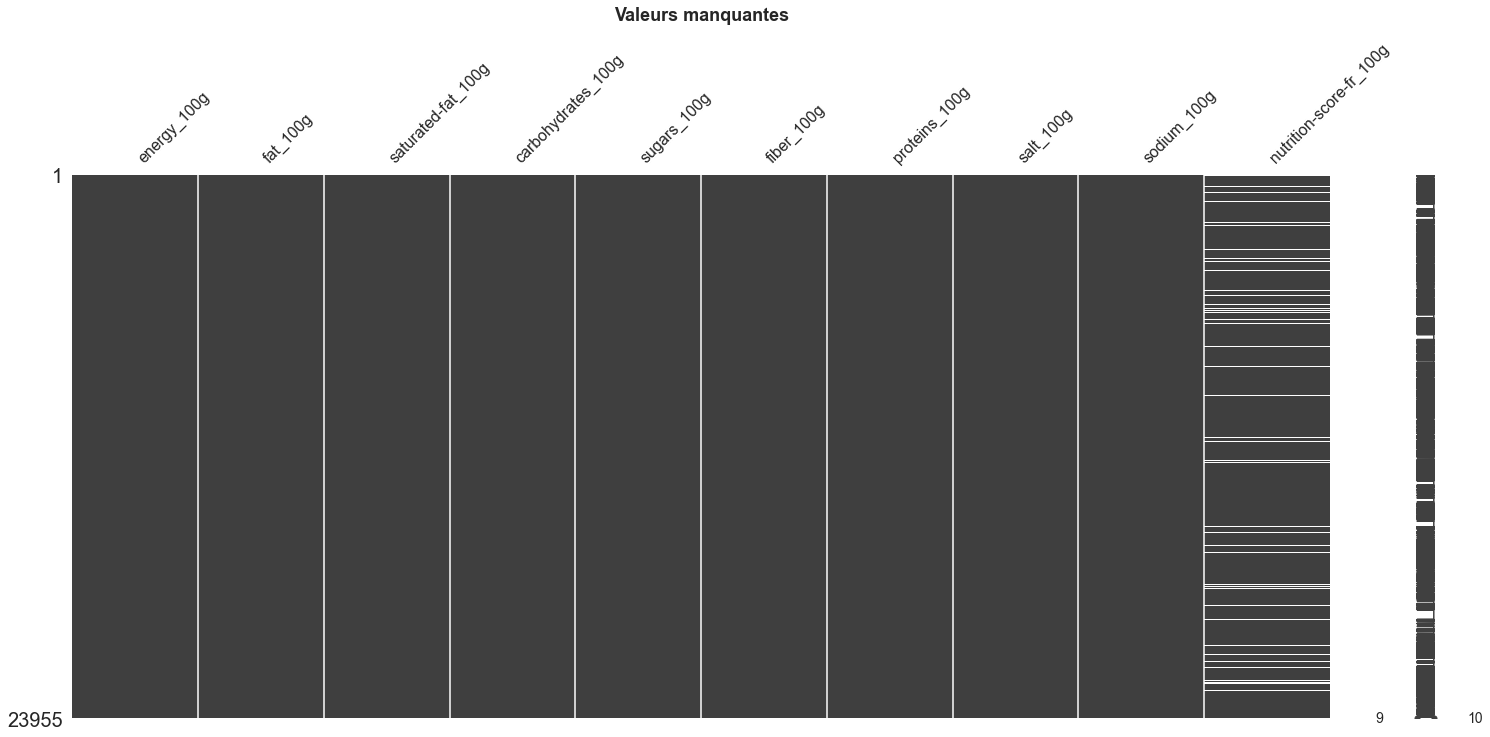

In [56]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

### IterativeImputer

In [57]:
df_data = df_data_fr[nutri_cols_ne]

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [59]:
# Copy the data
df_data_ii_imputed = df_data.copy(deep=True)

# Init
ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=10, random_state=1121218
)

# Tranform
df_data_ii_imputed.loc[:, :] = ii_imp.fit_transform(df_data_ii_imputed)

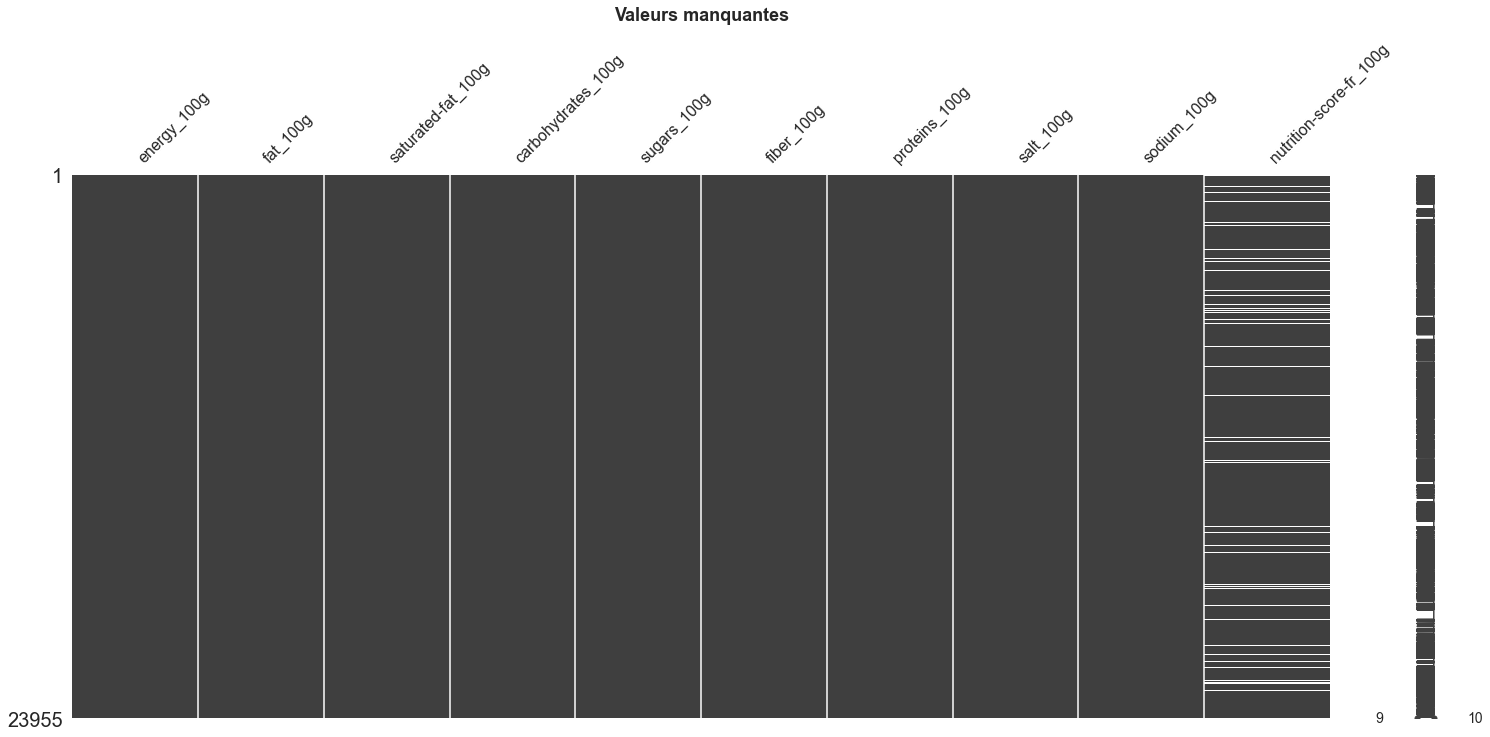

In [60]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

> But avoir toutes les colonnes remplies pour faire du KNN pour déterminer le score-grade, nous allons utiliser une régression linéaire pour définir les valeurs du nutri-score.

## Traitement des nutri-scores manquants

In [61]:
df_data_regr = df_data_fr[nutri_cols_all]
df_data_regr = df_data_regr[df_data_regr['nutrition-score-fr_100g'].notnull()]


# Récupération des valeurs
X = df_data_regr[nutri_cols]

# Valeurs cibles
y = df_data_regr['nutrition-score-fr_100g']

**Training et testing set :**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(15117, 9)
(6479, 9)


### Régression linéaire

**Création du modèle :**

In [63]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

**Evaluation :**

In [64]:
regr.score(X_test, y_test)

0.6077735259567697

### KNN Regressor

**Création du modèle :**

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1,10),
}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)

print('Meilleurs paramètres:',grid.best_params_)
print('Meilleur score:', grid.best_score_)

Meilleurs paramètres: {'n_neighbors': 5}
Meilleur score: 0.6969073634746045


In [66]:
knn_regr_model = grid.best_estimator_
knn_regr_model.score(X_test, y_test)

0.7074547085288592

**Courbe d'apprentissage :**

In [67]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(
    knn_regr_model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

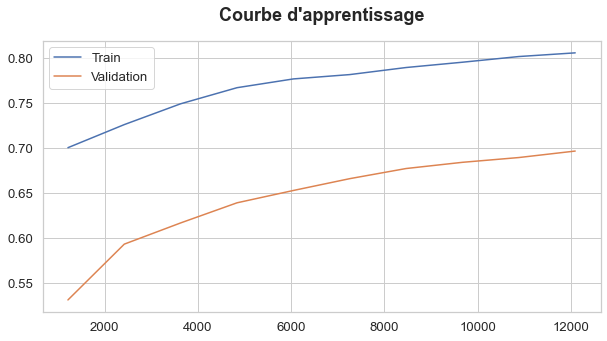

In [68]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot(x = N, y = train_score.mean(axis=1), label="Train")
ax1 = sns.lineplot(x = N, y = val_score.mean(axis=1), label="Validation")
ax.set_title("Courbe d'apprentissage")

plt.show()

**Remplacement des valeurs manquantes :**

In [69]:
df_data_to_predict = df_data_fr[nutri_cols_all]
df_data_to_predict = df_data_to_predict[df_data_to_predict['nutrition-score-fr_100g'].isnull()]
df_data_to_predict = df_data_to_predict[nutri_cols]

Y_pred = knn_regr_model.predict(df_data_to_predict)

df_data_to_predict['nutrition-score-fr_100g'] = Y_pred

df_data_to_predict.head(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
138,1481.00,4.17,6.49,77.08,22.16,6.20,6.25,1.83,0.72,6.20
774,63.00,0.00,0.00,34.46,3.00,0.00,0.19,0.00,0.00,3.20


In [70]:
df_data_fr['nutrition-score-fr_100g'] = df_data_fr['nutrition-score-fr_100g'].fillna(df_data_to_predict['nutrition-score-fr_100g'])

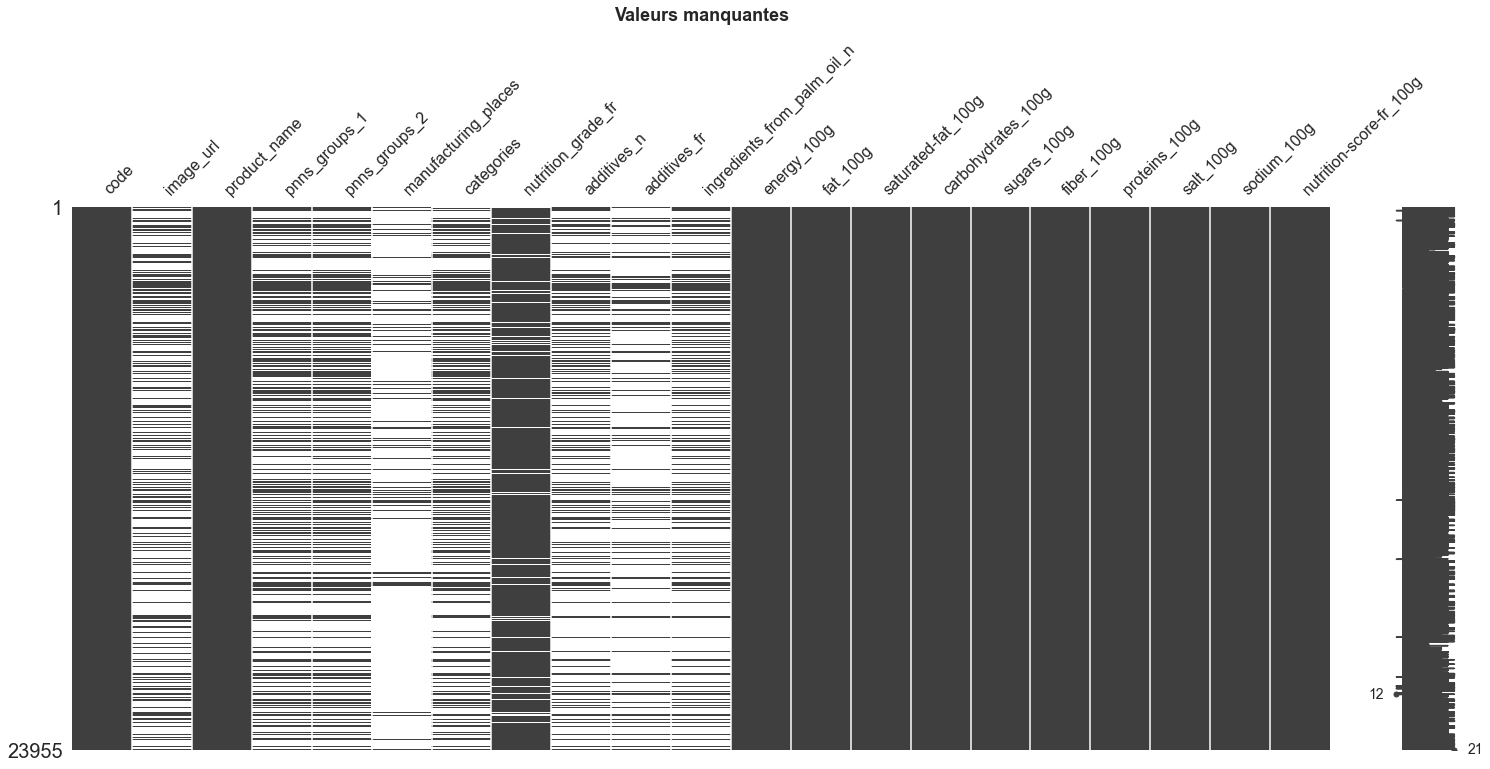

In [71]:
msno.matrix(df_data_fr)
plt.title("Valeurs manquantes", pad=20)
plt.show()

## Traitement des nutri-grades manquants

In [87]:
print(df_data_fr["nutrition_grade_fr"].isnull().sum(axis = 0))

2359


In [88]:
print(df_data_fr["nutrition_grade_fr"].notnull().sum(axis = 0))

21596


### Centrage et réduction

Les variables ne sont pas exprimées dans les mêmes unités. On réalise donc un centrage et une réduction.

In [73]:
from sklearn import preprocessing

In [74]:
df_temp = df_data_fr[nutri_cols]
X = df_temp.values
names = df_temp.index

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
df_norm = pd.DataFrame(X_scaled, columns=df_temp.columns)

df_norm["nutrition_grade_fr"] = df_data_fr["nutrition_grade_fr"]

In [75]:
df_norm.head()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_grade_fr
0,0.62,-0.53,0.21,2.31,0.28,0.88,-0.04,0.09,0.09,NaN
1,0.96,0.83,-0.44,-0.35,3.32,-0.22,-0.70,-0.22,-0.22,NaN
2,1.79,0.71,-0.20,0.84,1.59,0.40,0.34,-0.22,-0.22,NaN
3,-1.04,-1.01,-0.53,-0.81,-0.26,-0.40,-0.77,-0.22,-0.22,NaN
4,0.11,-0.29,0.73,1.92,-0.70,-0.11,0.10,-0.09,-0.09,NaN


In [76]:
df_norm.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.27,-1.01,-0.53,-1.29,-0.74,-0.40,-0.77,-0.23,-0.23
25%,-0.94,-0.97,-0.52,-0.78,-0.68,-0.40,-0.71,-0.22,-0.22
50%,-0.15,-0.08,-0.42,-0.20,-0.42,-0.35,-0.30,-0.18,-0.18
75%,0.72,0.53,0.13,0.55,0.23,0.05,0.28,-0.04,-0.04
max,3.54,10.46,10.93,3.38,3.90,20.21,10.89,17.18,17.18


## KNN

In [77]:
df_data_knn = df_norm[df_norm['nutrition_grade_fr'].notnull()]
df_norm.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00,23955.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.27,-1.01,-0.53,-1.29,-0.74,-0.40,-0.77,-0.23,-0.23
25%,-0.94,-0.97,-0.52,-0.78,-0.68,-0.40,-0.71,-0.22,-0.22
50%,-0.15,-0.08,-0.42,-0.20,-0.42,-0.35,-0.30,-0.18,-0.18
75%,0.72,0.53,0.13,0.55,0.23,0.05,0.28,-0.04,-0.04
max,3.54,10.46,10.93,3.38,3.90,20.21,10.89,17.18,17.18


**Création des données d'entraienement :**

In [78]:
# Sélection des valeurs
X = df_data_knn[nutri_cols]

# Sélection de la colonne cible
y = df_data_knn['nutrition_grade_fr']

In [ ]:
print(len(X))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(67, 9)
(30, 9)


**Création du modèle :**

In [80]:
from sklearn import cluster
from sklearn import metrics

# Nombre de clusters souhaités
n_clust = 5

# Clustering par K-means
modele_kmeans = cluster.KMeans(n_clusters=n_clust)
class_modele_kmeans = modele_kmeans.fit(X_train)

# Récupération des clusters attribués à chaque individu
k_means_clusters = class_modele_kmeans.labels_

df_K_means = pd.DataFrame(k_means_clusters)

y_pred_kmean = modele_kmeans.predict(X_test)

In [81]:
print(len(y_pred_kmean))

30


**Evaluation du modèle :**

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

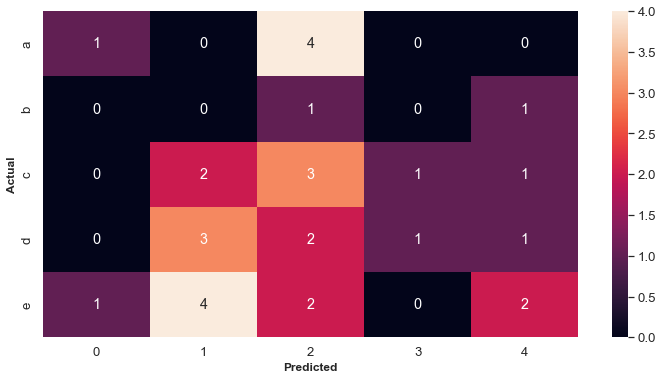

In [82]:
# Détermination des clusters True et False
valeurs_uniques, compte_des_valeurs_uniques = np.unique(y_pred_kmean, return_counts=True)
cnf_matrix = pd.crosstab(y_test, y_pred_kmean, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(cnf_matrix, annot=True, fmt='n')

Pour le programme prendre les noms des colonnes en dur